# Data Science com Python


##O que é Data Science?

![Data Science Process](https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Data_visualization_process_v1.png/640px-Data_visualization_process_v1.png)

## Por que Python?

Talvez Python não seja a melhor linguagem para nada, mas é "a segunda melhor para tudo".

Ecossistema: NumPy, SciPy, Pandas, scikit-learn, Bokeh, Seaborn, pyspark, etc...


## Pandas = Python for Data Analysis
![Pandas](http://pandas.pydata.org/_static/pandas_logo.png)


#### Importando bibliotecas e configurando gráficos

In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
#configura figuras
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6)

Populating the interactive namespace from numpy and matplotlib


## Importando dados: Acidentes de Trânsito #datapoa

http://datapoa.com.br/dataset/acidentes-de-transito


In [3]:
urls = """http://datapoa.com.br/storage/f/2013-11-06T17%3A26%3A29.293Z/acidentes-2000.csv
http://datapoa.com.br/storage/f/2013-11-06T17%3A30%3A42.711Z/acidentes-2001.csv
http://datapoa.com.br/storage/f/2013-11-06T17%3A34%3A58.965Z/acidentes-2002.csv
http://datapoa.com.br/storage/f/2013-11-06T17%3A38%3A06.476Z/acidentes-2003.csv
http://datapoa.com.br/storage/f/2013-11-06T17%3A40%3A46.014Z/acidentes-2004.csv
http://datapoa.com.br/storage/f/2013-11-06T14%3A25%3A20.052Z/acidentes-2005.csv
http://datapoa.com.br/storage/f/2013-11-06T16%3A33%3A16.142Z/acidentes-2006.csv
http://datapoa.com.br/storage/f/2013-11-06T16%3A38%3A56.849Z/acidentes-2007.csv
http://datapoa.com.br/storage/f/2013-11-06T16%3A47%3A41.635Z/acidentes-2008.csv
http://datapoa.com.br/storage/f/2013-11-06T16%3A52%3A35.356Z/acidentes-2009.csv
http://datapoa.com.br/storage/f/2013-11-08T12%3A22%3A45.238Z/acidentes-2010.csv
http://datapoa.com.br/storage/f/2013-11-08T12%3A31%3A12.053Z/acidentes-2011.csv
http://datapoa.com.br/storage/f/2013-11-08T12%3A32%3A00.175Z/acidentes-2012.csv
http://datapoa.com.br/storage/f/2014-03-14T18%3A41%3A42.892Z/acidentes-2013.csv""".split("\n")

In [4]:
# Parser para datas não padronizadas dos arquivos
def parser(d):
    formats = ["%Y%m%d %H:%M", "%Y%m%d", "%Y%m%d %H :%M"]
    for date_format in formats:
        try:
            return datetime.datetime.strptime(d, date_format)
        except ValueError:
            pass
    raise ValueError(d)

In [5]:
frames = [pd.read_csv(url, 
                      sep=";", 
                      decimal=",", 
                      na_values=["_"], 
                      parse_dates=["DATA_HORA"],
                      date_parser=parser) 
          for url in urls]

/Library/Python/2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/Library/Python/2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [6]:
# Concatena todos os data frames
df = pd.concat(frames)

In [7]:
#Exportando dados
df.to_csv("acidentes.csv")

## Filtrando e agrupando dados

In [8]:
df.head()

,ANO,AUTO,BICICLETA,BOLETIM,CAMINHAO,CARROCA,CONSORCIO,CONT_ACID,CONT_VIT,CORREDOR,...,ONIBUS_MET,ONIBUS_URB,OUTRO,PREDIAL1,QUEDA_ARR,REGIAO,TAXI,TEMPO,TIPO_ACID,UPS
0,2000,2,0,NaN,0,0,NaN,1,0,NaN,...,NaN,0,0,952,NaN,NORTE,0,BOM,EVENTUAL,1
1,2000,1,0,100,0,0,NaN,1,1,NaN,...,NaN,0,0,243,NaN,LESTE,0,BOM,CHOQUE,5
2,2000,2,0,NaN,0,0,NaN,1,0,NaN,...,NaN,0,0,694,NaN,NORTE,0,BOM,COLISAO,1
3,2000,2,0,NaN,0,0,NaN,1,0,NaN,...,NaN,0,0,0,NaN,CENTRO,0,BOM,ABALROAMENTO,1
4,2000,2,0,NaN,0,0,NaN,1,0,NaN,...,NaN,0,0,375,NaN,SUL,0,BOM,ABALROAMENTO,1


In [9]:
df.columns

Index([u'ANO', u'AUTO', u'BICICLETA', u'BOLETIM', u'CAMINHAO', u'CARROCA',
       u'CONSORCIO', u'CONT_ACID', u'CONT_VIT', u'CORREDOR', u'DATA_HORA',
       u'DIA', u'DIA_SEM', u'FATAIS', u'FERIDOS', u'FERIDOS_GR', u'FONTE',
       u'FX_HORA', u'ID', u'LATITUDE', u'LOCAL', u'LOCAL_VIA', u'LOG1',
       u'LOG2', u'LONGITUDE', u'LOTACAO', u'MES', u'MORTES', u'MORTE_POST',
       u'MOTO', u'NOITE_DIA', u'ONIBUS_INT', u'ONIBUS_MET', u'ONIBUS_URB',
       u'OUTRO', u'PREDIAL1', u'QUEDA_ARR', u'REGIAO', u'TAXI', u'TEMPO',
       u'TIPO_ACID', u'UPS'],
      dtype='object')

In [10]:
df.shape

(300839, 42)

In [11]:
df.describe()

,ANO,AUTO,BICICLETA,CAMINHAO,CARROCA,CONT_ACID,CONT_VIT,CORREDOR,DIA,FATAIS,...,MORTE_POST,MOTO,ONIBUS_INT,ONIBUS_MET,ONIBUS_URB,OUTRO,PREDIAL1,QUEDA_ARR,TAXI,UPS
count,300839.000000,300839.000000,300839.000000,300839.000000,300839.000000,300839,300839.000000,20799.000000,300839.000000,300839.000000,...,300839.000000,300839.000000,300839.000000,20799.000000,300839.000000,300839.000000,300839.000000,20799.000000,300839.000000,300839.000000
mean,2006.637288,1.414883,0.013522,0.135827,0.002952,1,0.265012,0.025530,15.619318,0.006698,...,0.003467,0.185056,0.026881,0.010529,0.054760,0.008460,1161.575803,0.000192,0.078311,2.111425
std,3.977727,0.756436,0.119652,0.361406,0.054250,0,0.441340,0.157732,8.765300,0.085584,...,0.059230,0.402871,0.165174,0.103941,0.230977,0.094305,2190.710720,0.013867,0.279836,1.956263
min,2000.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2003.000000,1.000000,0.000000,0.000000,0.000000,1,0.000000,0.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2007.000000,1.000000,0.000000,0.000000,0.000000,1,0.000000,0.000000,16.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,301.000000,0.000000,0.000000,1.000000
75%,2010.000000,2.000000,0.000000,0.000000,0.000000,1,1.000000,0.000000,23.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1430.000000,0.000000,0.000000,5.000000
max,2013.000000,11.000000,15.000000,5.000000,1.000000,1,1.000000,1.000000,31.000000,5.000000,...,2.000000,9.000000,3.000000,2.000000,3.000000,3.000000,235033.000000,1.000000,8.000000,13.000000


In [12]:
#Timestamp inicial e final
[df["DATA_HORA"].min(), df["DATA_HORA"].max()]

[Timestamp('2000-01-01 01:45:00'), Timestamp('2013-12-31 22:20:00')]

In [13]:
#Quantidade de acidentes com carroças
df[df["CARROCA"] > 0].shape

(888, 42)

In [14]:
#Sintaxe alternativa para query
df.query("CARROCA > 0").shape

(888, 42)

In [15]:
#Query para comparar campos
df.query("MORTES != FATAIS")[["MORTES", "MORTE_POST", "FATAIS"]].head()

,MORTES,MORTE_POST,FATAIS
22,0,1,1
33,0,1,1
149,0,1,1
606,0,1,1
1007,0,1,1


In [16]:
df.query("MORTES + MORTE_POST != FATAIS")

,ANO,AUTO,BICICLETA,BOLETIM,CAMINHAO,CARROCA,CONSORCIO,CONT_ACID,CONT_VIT,CORREDOR,...,ONIBUS_MET,ONIBUS_URB,OUTRO,PREDIAL1,QUEDA_ARR,REGIAO,TAXI,TEMPO,TIPO_ACID,UPS


In [17]:
#Número médio de mortes por acidente
df["MORTES"].mean()

0.0032309640704828828

In [18]:
#Quantidade de acidentes x quantidade de mortes 
df["MORTES"].value_counts()

 0    299918
 1       875
 2        38
 3         6
-1         1
 4         1
dtype: int64

In [19]:
# Agrupamento por região
df.groupby("REGIAO")["FERIDOS", "MORTES"].sum()

,FERIDOS,MORTES
REGIAO,,
CENTRO,13200,63
LESTE,29541,288
NAO CADASTRADO,113,0
NAO IDENTIFICADO,70,0
NORTE,29659,327
SUL,26902,294


In [20]:
df["TIPO_ACID"].value_counts()

ABALROAMENTO      138841
COLISAO           100706
CHOQUE             30960
ATROPELAMENTO      17476
QUEDA               5458
EVENTUAL            5157
CAPOTAGEM           1351
TOMBAMENTO           758
INCENDIO              79
NAO CADASTRADO        53
dtype: int64

In [21]:
# Descrevendo valores agregados
df[df["TIPO_ACID"] == "ATROPELAMENTO"][["FERIDOS", "FATAIS", "MORTES", "MORTE_POST"]].describe()

,FERIDOS,FATAIS,MORTES,MORTE_POST
count,17476.000000,17476.000000,17476.000000,17476.000000
mean,1.093614,0.052472,0.019512,0.032959
std,0.478364,0.226295,0.140782,0.179495
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000
max,14.000000,3.000000,2.000000,2.000000


In [22]:
# Pivot tables
pivot = df.pivot_table(values=["FERIDOS"], index=["TIPO_ACID"], columns=["NOITE_DIA"], aggfunc=np.mean)
pivot

FERIDOS          
NOITE_DIA            DIA     NOITE
TIPO_ACID                         
ABALROAMENTO    0.269961  0.453526
ATROPELAMENTO   1.089918  1.100408
CAPOTAGEM       0.640483  0.995482
CHOQUE          0.193351  0.404412
COLISAO         0.143574  0.253403
EVENTUAL        0.127723  0.188612
INCENDIO        0.084746  0.000000
NAO CADASTRADO  0.200000  0.555556
QUEDA           1.045575  1.080412
TOMBAMENTO      0.277358  0.446429

###Sandals: Shameless plug

![Sandals](https://raw.githubusercontent.com/jbochi/sandals/master/logo.jpg)
http://github.com/jbochi/sandals

In [23]:
from sandals import sql

In [24]:
sql("""SELECT
        LOG1, LOG2, DATA_HORA, FERIDOS, MORTES, MORTE_POST
       FROM acidentes
       ORDER BY MORTES DESC LIMIT 3""", 
    {"acidentes": df})

,LOG1,LOG2,DATA_HORA,FERIDOS,MORTES,MORTE_POST
10926,R MOSTARDEIRO,R CEL BORDINI,2013-07-11 05:00:00,1,4,1
19901,VDT DOM PEDRO I,AV BORGES DE MEDEIROS,2002-11-24 01:50:00,0,3,0
10387,ESTR AFONSO LOURENCO MARIANTE,NaN,2007-07-01 22:15:00,2,3,0


In [25]:
sql("select TEMPO, NOITE_DIA, AVG(FERIDOS) from acidentes GROUP BY TEMPO, NOITE_DIA", {"acidentes": df})

FERIDOS
TEMPO      NOITE_DIA          
BOM        DIA        0.315749
           NOITE      0.483529
CHUVOSO    DIA        0.145985
           NOITE      0.297952
NAO CADAST DIA        0.402139
           NOITE      0.591281
NUBLADO    DIA        0.094429
           NOITE      0.281046

In [26]:
sql("select TIPO_ACID, AVG(FERIDOS), COUNT(*) from acidentes GROUP BY TIPO_ACID", {"acidentes": df})

,FERIDOS,TIPO_ACID
TIPO_ACID,,
ABALROAMENTO,0.329434,138841
ATROPELAMENTO,1.093614,17476
CAPOTAGEM,0.829016,1351
CHOQUE,0.284561,30960
COLISAO,0.177417,100706
EVENTUAL,0.149506,5157
INCENDIO,0.063291,79
NAO CADASTRADO,0.320755,53
QUEDA,1.060828,5458


## Visualizando dados

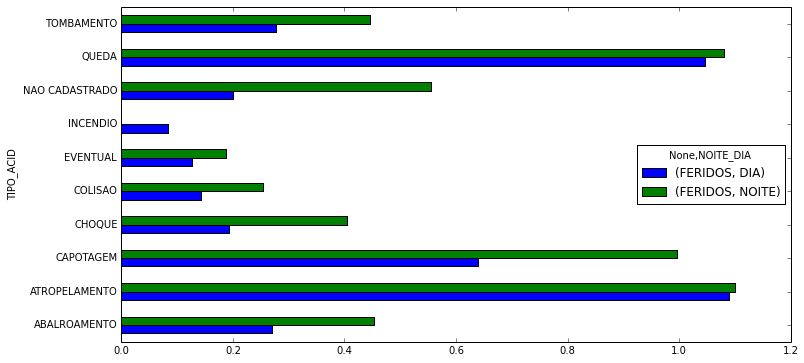

In [27]:
pivot.plot(kind='barh')

array([[<matplotlib.axes.AxesSubplot object at 0x1123229d0>,
        <matplotlib.axes.AxesSubplot object at 0x11439ce90>]], dtype=object)

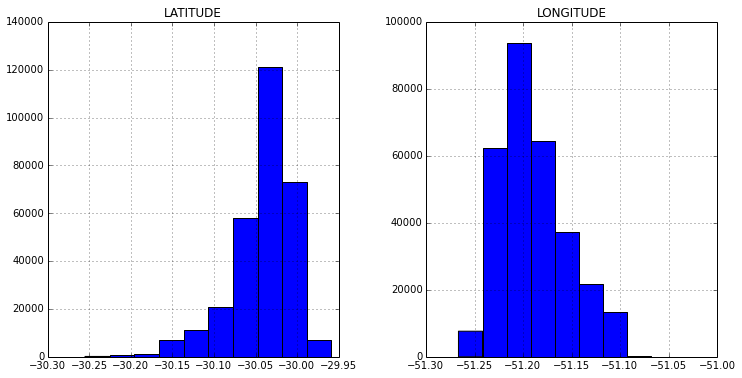

In [28]:
df[["LONGITUDE", "LATITUDE"]].hist(figsize=(12, 6))

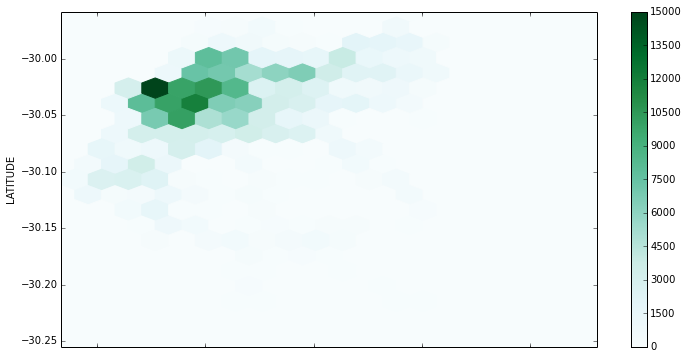

In [29]:
df.plot(kind='hexbin', x='LONGITUDE', y='LATITUDE', gridsize=20)

### Dados com categorias

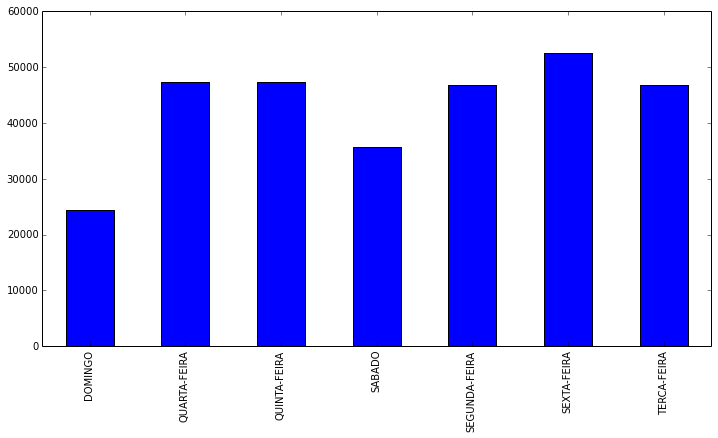

In [30]:
df["DIA_SEM"].value_counts().sort_index().plot(kind="bar")

In [31]:
df["DIA_SEMANA"] = df["DIA_SEM"].astype("category")

In [32]:
df["DIA_SEMANA"] = df["DIA_SEMANA"].cat.set_categories(["DOMINGO", "SEGUNDA-FEIRA", "TERCA-FEIRA", 
                                                        "QUARTA-FEIRA", "QUINTA-FEIRA", "SEXTA-FEIRA", "SABADO"])

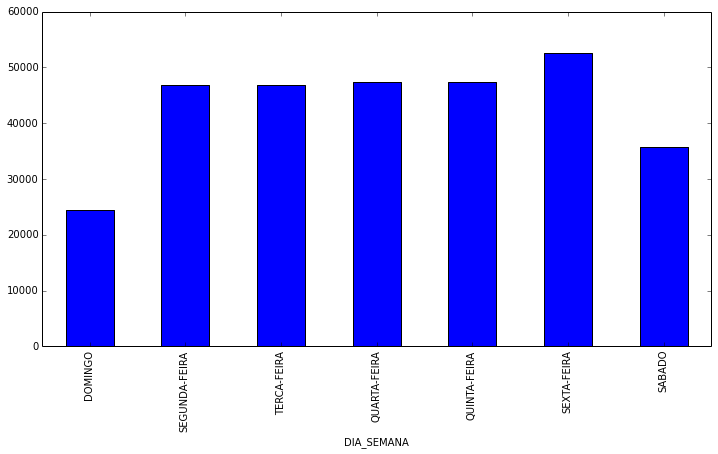

In [33]:
df.groupby("DIA_SEMANA").size().plot(kind="bar")

##Séries temporais

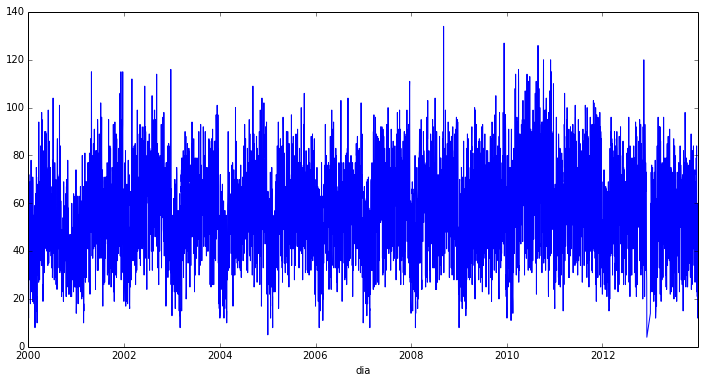

In [34]:
acidentes_por_dia = df["DATA_HORA"].groupby(df["DATA_HORA"].apply(lambda r: r.date())).count()
acidentes_por_dia.index.name = "dia"
acidentes_por_dia.plot()

In [35]:
idf = df.set_index(pd.DatetimeIndex(df['DATA_HORA']))

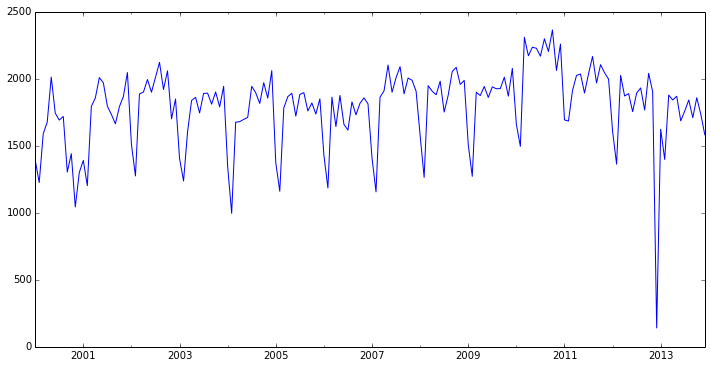

In [36]:
# Quantidade de acidentes por mês
idf["ID"].resample('1M', how='count').plot()

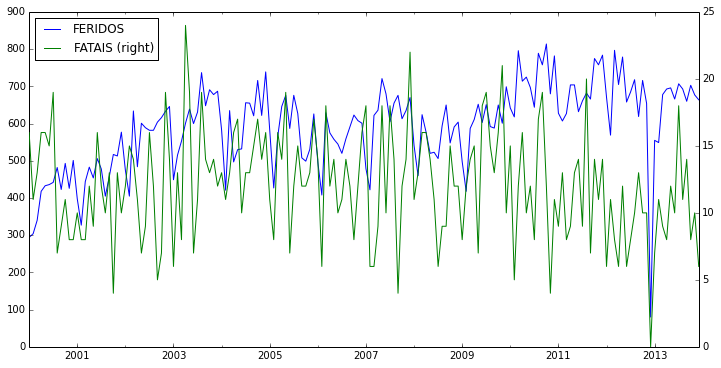

In [37]:
# Total de mortos e feridos
idf[["FERIDOS", "FATAIS"]].resample('1M', how='sum').plot(secondary_y="FATAIS")

##Box plots!

/Library/Python/2.7/site-packages/pandas/tools/plotting.py:2633: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


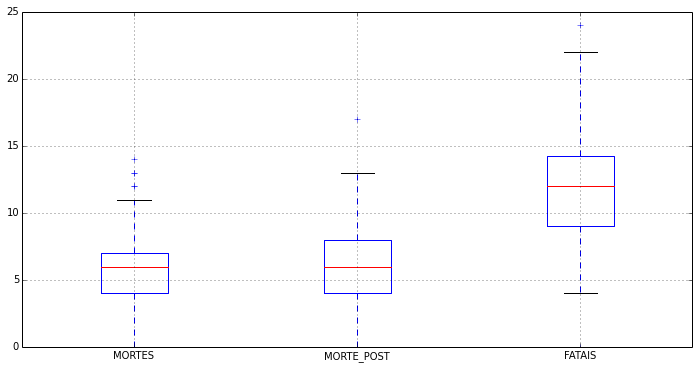

In [38]:
idf[["MORTES", "MORTE_POST", "FATAIS"]].resample('1M', how='sum').boxplot();

![boxplot](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/550px-Boxplot_vs_PDF.svg.png)

##Intermezzo: matplotlib e seaborn
![matplotlib](http://matplotlib.org/_static/logo2.png)

In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [40]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

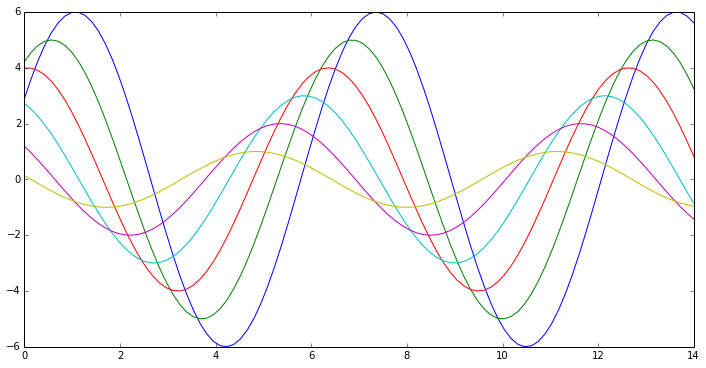

In [41]:
sinplot()

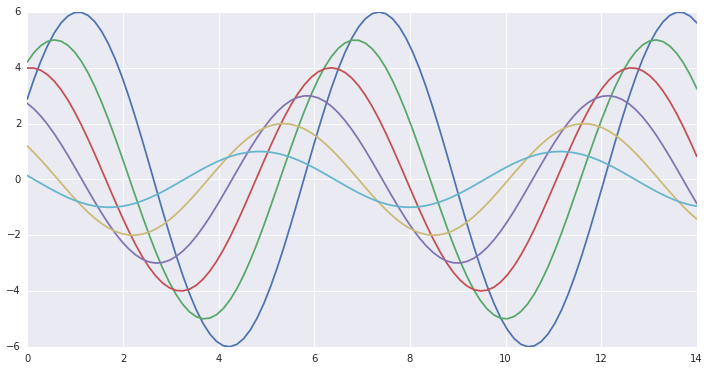

In [42]:
# Para mudar o estilo, basta importar o seaborn (e redefinir tamanho da figura)
import seaborn as sns

sns.set(rc={"figure.figsize": (12, 6)})
sinplot()

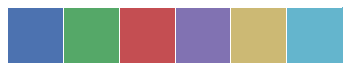

In [43]:
# Paleta de cores padrão
current_palette = sns.color_palette()
sns.palplot(current_palette)

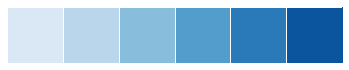

In [44]:
# Muitas paletas disponíveis
sns.palplot(sns.color_palette("Blues"))

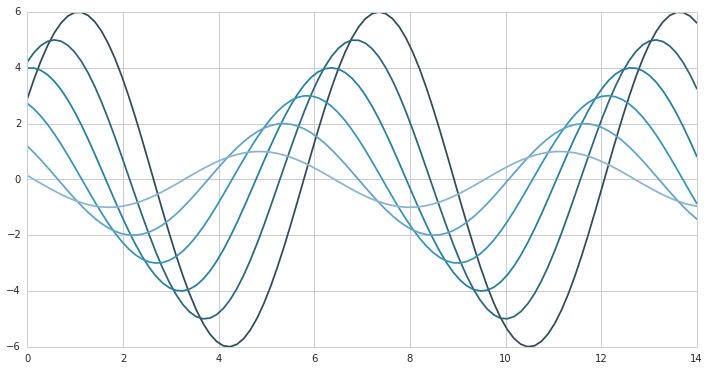

In [45]:
# Usando outras paletas e estilo
sns.set_style("whitegrid")
sns.set_palette("PuBuGn_d")
sinplot()

##Aplicando no nosso dataset

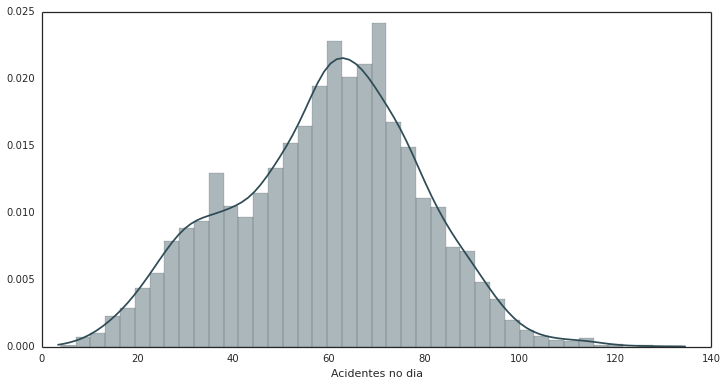

In [46]:
# Visualizando distribuições (KDE e Histogramas)
sns.set_style("white")
sns.distplot(acidentes_por_dia,axlabel="Acidentes no dia");

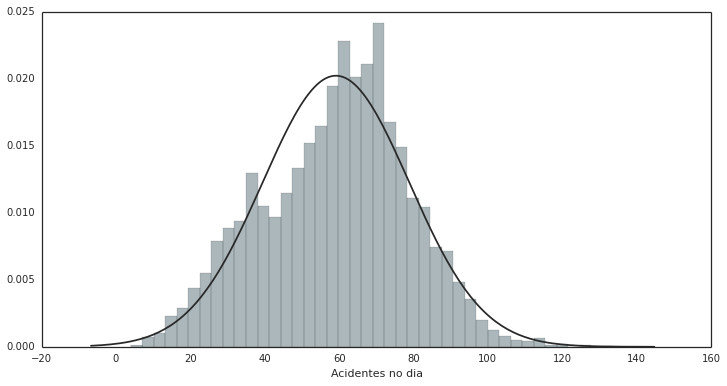

In [47]:
#Fitting (com SciPy)
from scipy import stats
sns.distplot(acidentes_por_dia,axlabel="Acidentes no dia", kde=False, fit=stats.norm);

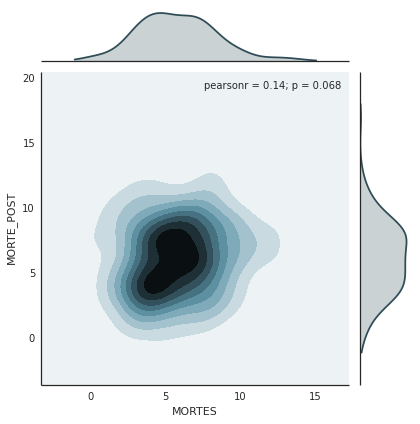

In [48]:
# Visualizando distribuições bivariadas
data = idf[["MORTES", "MORTE_POST", "FATAIS"]].resample('1M', how='sum')
sns.jointplot(x="MORTES", y="MORTE_POST", data=data, kind='kde');

###box plots reloaded!

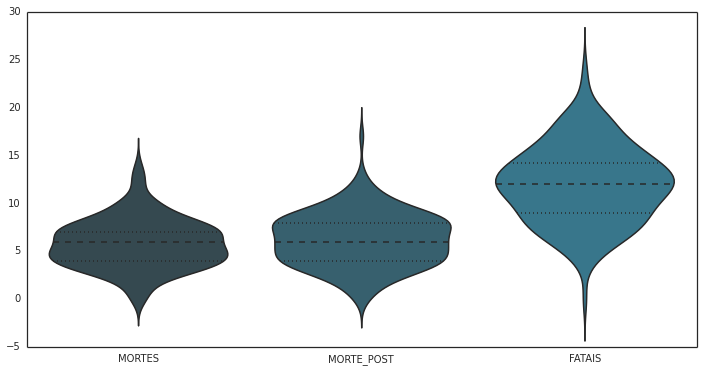

In [49]:
data = idf[["MORTES", "MORTE_POST", "FATAIS"]].resample('1M', how='sum')
sns.violinplot(data);

##Intermezzo II: Bokeh


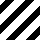
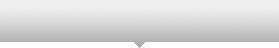
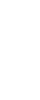
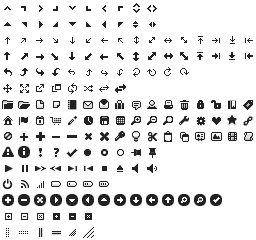
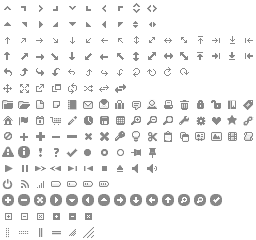
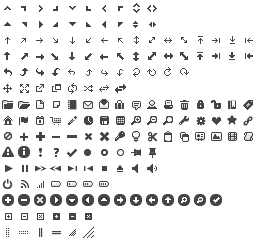
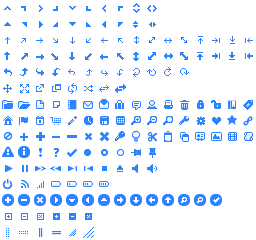
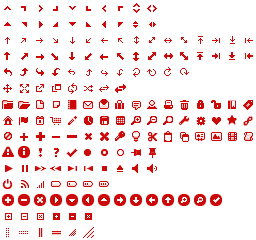
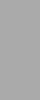
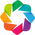
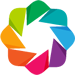
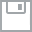
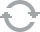
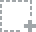
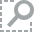
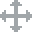
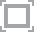
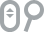

In [50]:
from bokeh import mpl
from bokeh.plotting import output_notebook, show

output_notebook()

sns.violinplot(data, color="Set3")
plt.title("Seaborn violin plot in bokeh.")
show(mpl.to_bokeh(name="violin"))

##Scikit-learn: Classificando os acidentes

![scikit-learn](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

In [51]:
from sklearn import svm

In [52]:
columns = ["FX_HORA", "FERIDOS", "MORTES", "MORTE_POST"]

In [53]:
X = df[columns].fillna(0)

In [54]:
y = df["TIPO_ACID"] == "ATROPELAMENTO"

![SVM](http://scikit-learn.org/stable/_images/plot_iris_0012.png)

In [55]:
classifier = svm.LinearSVC()

In [56]:
classifier.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=None, tol=0.0001, verbose=0)

In [57]:
x = [18, 0, 1, 0] #["FX_HORA", "FERIDOS", "MORTES", "MORTE_POST"]
classifier.predict([x])

array([False], dtype=bool)

In [58]:
x = [18, 5, 0, 0]
classifier.predict([x])

array([ True], dtype=bool)

Disclaimer: Não é assim que se faz machine learning.
É possível fazer todo o pipeline de treino, validação e teste com scikit-learn.

###Spark
![Spark](https://spark.apache.org/images/spark-logo.png)

In [59]:
sc

In [60]:
acidentes = sc.textFile("acidentes.csv")

In [61]:
acidentes

MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:-2

In [62]:
lines = acidentes.map(lambda row: row.split(","))
header = lines.take(1)[0]

In [63]:
lines

PythonRDD[3] at RDD at PythonRDD.scala:43

In [64]:
logradouro_ix = header.index("LOG1")
count_palavras = lines.flatMap(
                    lambda row: row[logradouro_ix].split(" ")).map(
                    lambda w: (w, 1)).reduceByKey(
                    lambda a, b: a + b)

In [65]:
count_palavras.takeOrdered(10, lambda k: -k[1])

[(u'AV', 180683),
 (u'R', 108403),
 (u'DE', 33715),
 (u'DA', 17857),
 (u'BRASIL', 17265),
 (u'IPIRANGA', 16160),
 (u'ASSIS', 13692),
 (u'ALVES', 13493),
 (u'DR', 12503),
 (u'PROTASIO', 12357)]

##Exemplo real globo.com.

Análise de conversão de cada recomendação do TechTudo de acordo com posição
do item no ranking.

In [66]:
import pyspark

In [67]:
sql_context = pyspark.sql.SQLContext(sc)

In [68]:
data = sqlContext.parquetFile("ttpos")

In [69]:
data

DataFrame[experiment: string, position: int, count: bigint]

In [70]:
data.take(4)

[Row(experiment=u'TECHTUDO-HOME-MOBILE-user-sel-5', position=8, count=609),
 Row(experiment=u'TECHTUDO-HOME-user-sel-5', position=8, count=2551),
 Row(experiment=u'TECHTUDO-HOME-user-sel-5', position=10, count=3147),
 Row(experiment=u'TECHTUDO-HOME-user-sel-5', position=5, count=3501)]

In [71]:
tb = data.toPandas()

In [72]:
tb.head()

,experiment,position,count
0,TECHTUDO-HOME-MOBILE-user-sel-5,8,609
1,TECHTUDO-HOME-user-sel-5,8,2551
2,TECHTUDO-HOME-user-sel-5,10,3147
3,TECHTUDO-HOME-user-sel-5,5,3501
4,TECHTUDO-HOME-user-sel-5,6,3327


In [73]:
tb = tb.set_index(['position', 'experiment'])
tb = tb.unstack()
tb

count                         
experiment TECHTUDO-HOME-MOBILE-user-sel-5 TECHTUDO-HOME-user-sel-5
position                                                           
1                                     1704                     7338
2                                     1195                     5056
3                                     1072                     4265
4                                      783                     3479
5                                      790                     3501
6                                      681                     3327
7                                      670                     2546
8                                      609                     2551
9                                      585                     2853
10                                     723                     3147

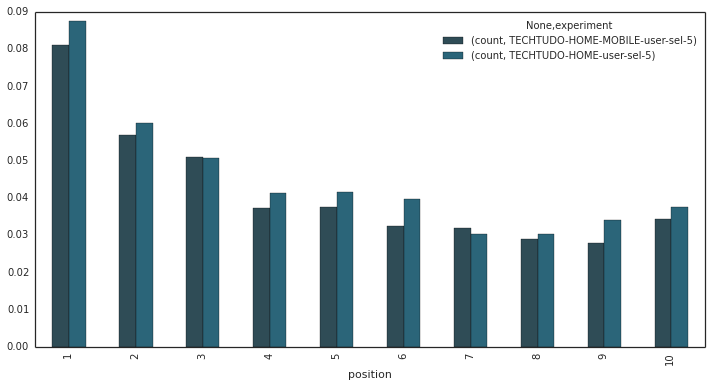

In [74]:
tb["count", "TECHTUDO-HOME-MOBILE-user-sel-5"] = tb["count"]["TECHTUDO-HOME-MOBILE-user-sel-5"] / 21019.0
tb["count", "TECHTUDO-HOME-user-sel-5"] = tb["count"]["TECHTUDO-HOME-user-sel-5"] / 83820.0
tb.plot(kind='bar', figsize=(12,6))

#Resumo:
    
###Bibliotecas utilizadas
* Pandas: Data analysis em geral (extração, limpeza, manipulação)
* Seaborn: Visualização
* Bokeh: Visualização interativa
* Scikit-learn: Machine learning
* Spark: Processamento distribuído

###Bibliotecas de baixo nível:
* Numpy
* Scipy
* matplotlib

###Outras bibliotecas recomendadas:
* NLTK: Processamento de linguagem natural
* Gensim: Topic modelling


##Obrigado!

Estamos contratado!

Imagens CC da wikipedia

Juarez Bochi
juarez.bochi@corp.globo.com